This notebook contains the final result plots (and appendix plots) for the task 5 Techinical report

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
policy_dict = {'operating_cost': "Operating Cost" ,
               'transit_speed': "Transit in-vehicle times",
               'av_vot': "AV Value of Time",
               'av_rates': "AV Rates",
               'telecommute_option': "Telecommute-Option",
               'tod': "TOD",
               'transit_frequency': "Transit Frequencies",
               'telecommute_frequency': "Telecommute-Frequencies",
               'tnc_price': "TNC Price",
               'transit_price': "Transit Fare" ,
               'park_ride': "Park & Ride",
               'share_tnc_price': "Shared TNC price",
               'cordon_pricing': "Cordon Pricing"}

In [114]:
def elasticity_plot(metric_name, title, category_name = None, cs = False):
    fpath = '../kpis/summary/{}.csv'.format(metric_name)
    df = pd.read_csv(fpath)#, index_col = 'policy')
    
    if cs:
        df['mean_elasticity'] = df['mean_elasticity'] * -1
    
    df = df.sort_values('mean_elasticity')
    df.policy = df.policy.replace(policy_dict)

    
    if category_name:
        df = df.rename(columns = {'category':category_name})
        sns.barplot(data = df, x = 'mean_elasticity', 
                    y = 'policy', hue = category_name)
        
    else:
        sns.barplot(data = df, x = 'mean_elasticity', y = 'policy', color= 'mediumseagreen')
    
    plt.xticks(rotation = 0, fontsize = 14)
    plt.yticks(fontsize = 20)
    plt.xlabel('{} Elasticity'.format(title), fontsize = 20)
    plt.ylabel('');
    return df

In [106]:
def elasticity_heatmap(file_name):
    
    fpath = '../kpis/summary/{}.csv'.format(file_name)
    df = pd.read_csv(fpath)#, index_col = 'policy')
    df = df.sort_values('mean_elasticity')
    df.policy = df.policy.replace(policy_dict)
    
    category_data = df.pivot_table(values = 'mean_elasticity',
                                   index = 'category', 
                                   columns = 'policy' )
    
    ax = sns.heatmap(category_data.T, annot=True, 
                     fmt=".2f", cmap="RdBu", 
                     annot_kws={"size": 12, "fontfamily": "serif"})

    ax.set(xlabel="", ylabel="")
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20);

# VMT

,policy,category,base_line,scenario_1_metric,scenario_2_metric,scenario_3_metric,scenario_4_metric,scenario_1_%change,scenario_2_%change,scenario_3_%change,scenario_4_%change,scenario_1_elasticity,scenario_2_elasticity,scenario_3_elasticity,scenario_4_elasticity,mean_elasticity
5,Operating Cost,none,1.191152e+08,9.919410e+07,1.083415e+08,1.246997e+08,1.329281e+08,1.00,0.50,-0.25,-0.5,-0.167243,-0.180897,-0.187530,-0.231924,-0.191898
8,Telecommute-Option,none,1.191152e+08,1.164461e+08,1.178401e+08,1.210432e+08,1.227856e+08,0.50,0.25,-0.25,-0.5,-0.044816,-0.042821,-0.064743,-0.061627,-0.053502
11,AV Value of Time,none,1.205067e+08,1.216499e+08,1.211204e+08,1.224156e+08,1.230249e+08,-0.10,-0.20,-0.40,-0.6,-0.094861,-0.025464,-0.039602,-0.034827,-0.048688
12,TOD,none,1.289013e+08,1.275856e+08,1.282975e+08,1.277158e+08,NaN,0.10,0.25,0.50,NaN,-0.102071,-0.018736,-0.018393,NaN,-0.046400
0,Transit Frequencies,none,1.191152e+08,1.169525e+08,1.179774e+08,1.204855e+08,1.223026e+08,2.00,1.00,-0.25,-0.5,-0.009079,-0.009553,-0.046013,-0.053518,-0.029541
9,Telecommute-Frequencies,none,1.191152e+08,1.210429e+08,1.200389e+08,1.182498e+08,1.158440e+08,-1.00,-0.50,1.00,2.0,-0.016183,-0.015509,-0.007266,-0.013731,-0.013172
3,TNC Price,none,1.191152e+08,1.184765e+08,1.188966e+08,1.188654e+08,1.206644e+08,0.50,0.25,-0.25,-0.5,-0.010726,-0.007343,0.008389,-0.026011,-0.008923
7,Park & Ride,none,1.191152e+08,1.196528e+08,1.189710e+08,1.187682e+08,1.195079e+08,0.50,0.25,-0.25,-0.5,0.009025,-0.004843,0.011655,-0.006594,0.002311
4,Shared TNC price,none,1.191152e+08,1.208377e+08,1.182608e+08,1.192792e+08,1.182012e+08,0.50,0.25,-0.25,-0.5,0.028921,-0.028693,-0.005507,0.015348,0.002517
1,Transit Fare,none,1.205067e+08,1.215040e+08,1.203399e+08,1.203388e+08,1.194865e+08,0.50,-0.25,-0.50,-1.0,0.016552,0.005539,0.002787,0.008466,0.008336


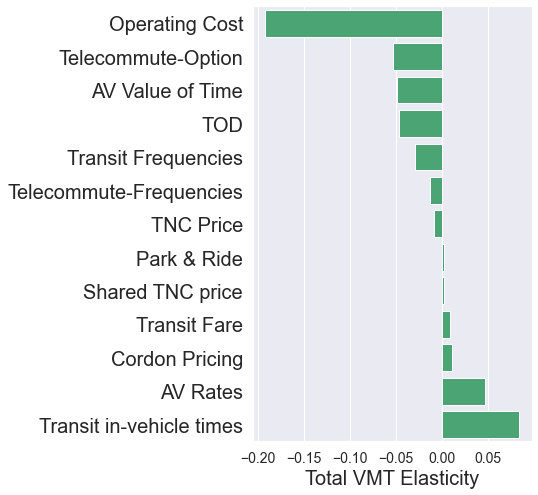

In [107]:
sns.set(rc={'figure.figsize':(5,8)})
elasticity_plot('total_vmt', 'Total VMT', category_name = None)

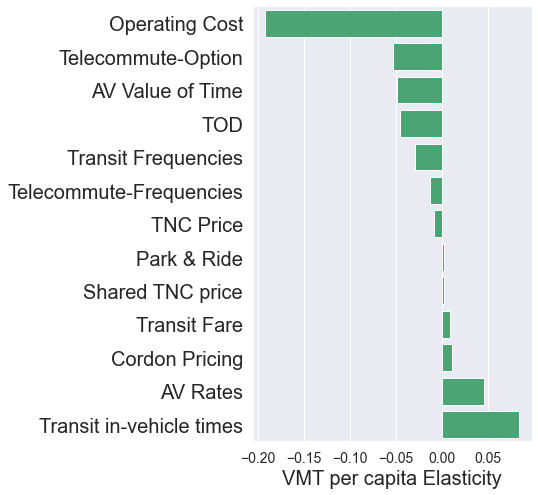

In [79]:
elasticity_plot('vmt_per_capita',  'VMT per capita', category_name = None)

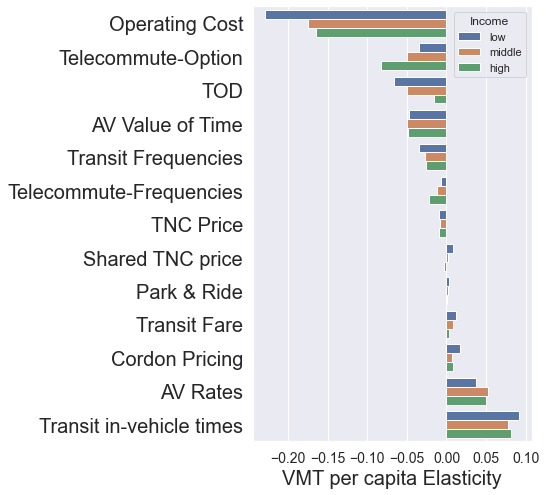

In [80]:
elasticity_plot('vmt_per_capita_income', 'VMT per capita', category_name = 'Income')

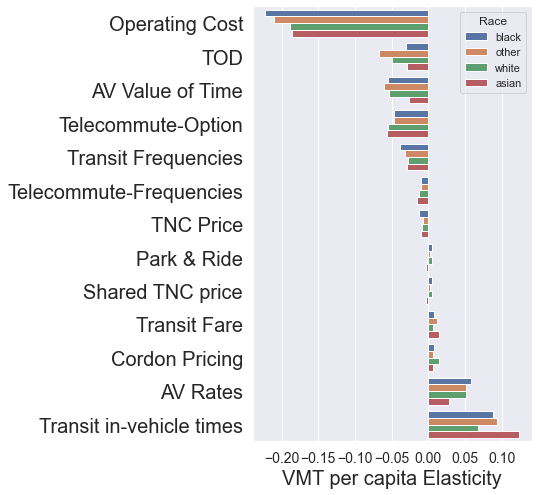

In [81]:
elasticity_plot('vmt_per_capita_race', 'VMT per capita', category_name = 'Race')

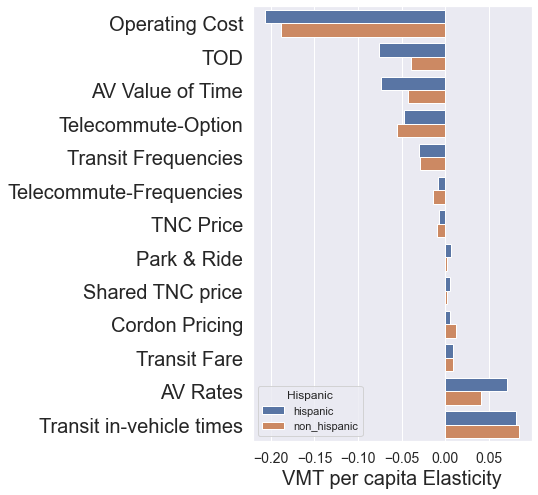

In [82]:
elasticity_plot('vmt_per_capita_hispanic', 
                'VMT per capita', 
                category_name = 'Hispanic')

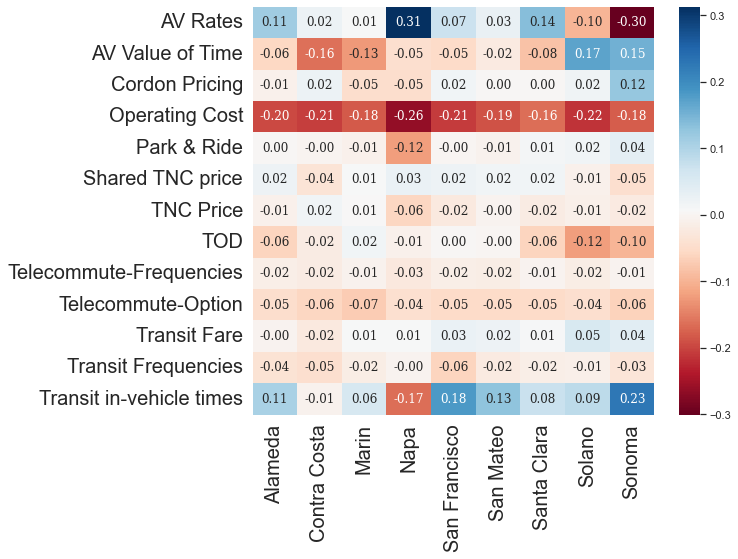

In [83]:
sns.set(rc={'figure.figsize':(9,7.5)})
elasticity_heatmap('vmt_per_capita_county')

# Consumer Surplus

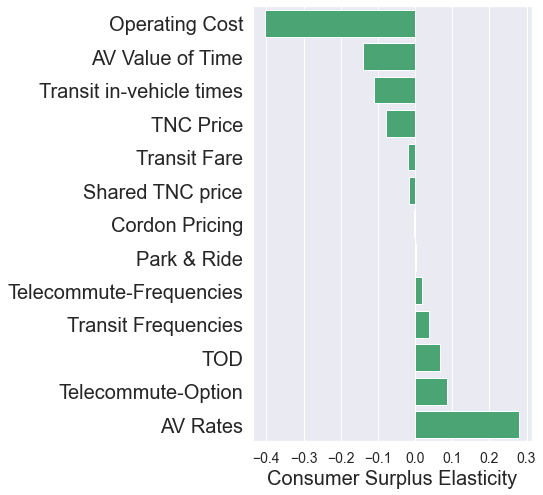

In [85]:
sns.set(rc={'figure.figsize':(5,8)})
elasticity_plot('total_cs', 
                'Consumer Surplus', 
                category_name = None, cs = True)

,policy,category,base_line,scenario_1_metric,scenario_2_metric,scenario_3_metric,scenario_4_metric,scenario_1_%change,scenario_2_%change,scenario_3_%change,scenario_4_%change,scenario_1_elasticity,scenario_2_elasticity,scenario_3_elasticity,scenario_4_elasticity,mean_elasticity
5,Operating Cost,none,-463.558121,-613.096655,-545.394401,-409.017822,-355.505045,1.00,0.50,-0.25,-0.5,0.322589,0.353079,0.470623,0.466190,-0.403120
11,AV Value of Time,none,-472.350076,-468.148892,-458.289919,-442.579538,-424.932009,-0.10,-0.20,-0.40,-0.6,0.088942,0.148832,0.157566,0.167313,-0.140663
2,Transit in-vehicle times,none,-472.350076,-459.345518,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,0.110126,NaN,NaN,NaN,-0.110126
3,TNC Price,none,-463.558121,-473.574281,-467.763555,-448.506376,-438.930550,0.50,0.25,-0.25,-0.5,0.043214,0.036288,0.129880,0.106255,-0.078909
1,Transit Fare,none,-472.350076,-478.834191,-469.967648,-471.366018,-463.157900,0.50,-0.25,-0.50,-1.0,0.027455,0.020175,0.004167,0.019461,-0.017814
4,Shared TNC price,none,-463.558121,-473.867882,-459.847604,-461.548144,-456.500683,0.50,0.25,-0.25,-0.5,0.044481,-0.032018,0.017344,0.030449,-0.015064
6,Cordon Pricing,none,-463.558121,-466.327160,-463.390820,-465.131366,-463.436476,0.25,0.10,-0.25,-0.5,0.023894,-0.003609,-0.013575,0.000525,-0.001809
7,Park & Ride,none,-463.558121,-465.192378,-462.905474,-463.068214,-466.086831,0.50,0.25,-0.25,-0.5,0.007051,-0.005632,0.004227,-0.010910,0.001316
9,Telecommute-Frequencies,none,-463.558121,-469.276083,-470.585388,-459.294957,-443.974150,-1.00,-0.50,1.00,2.0,-0.012335,-0.030319,-0.009197,-0.021124,0.018243
0,Transit Frequencies,none,-463.558121,-450.208512,-454.122733,-470.817047,-476.163153,2.00,1.00,-0.25,-0.5,-0.014399,-0.020354,-0.062637,-0.054384,0.037943


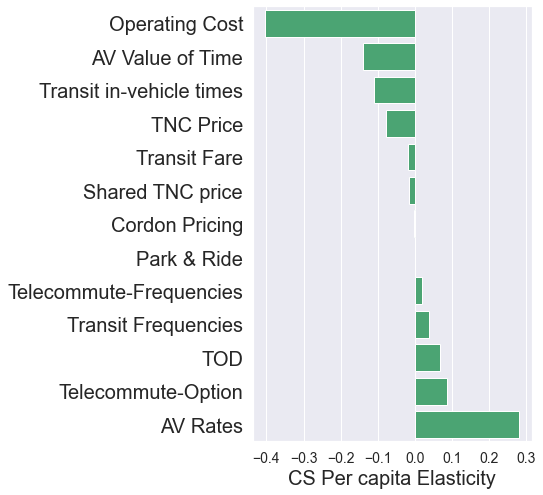

In [108]:
elasticity_plot('cs_per_capita', 
                'CS Per capita', 
                category_name = None, cs = True)

,policy,Income,base_line,scenario_1_metric,scenario_2_metric,scenario_3_metric,scenario_4_metric,scenario_1_%change,scenario_2_%change,scenario_3_%change,scenario_4_%change,scenario_1_elasticity,scenario_2_elasticity,scenario_3_elasticity,scenario_4_elasticity,mean_elasticity
17,Operating Cost,middle,-450.805715,-606.356943,-533.386526,-394.422710,-341.324939,1.00,0.50,-0.25,-0.5,0.345052,0.366370,0.500287,0.485712,-0.424355
15,Operating Cost,high,-444.245620,-586.275103,-527.766915,-387.723256,-335.990941,1.00,0.50,-0.25,-0.5,0.319709,0.376014,0.508929,0.487364,-0.423004
16,Operating Cost,low,-482.500387,-632.344402,-562.921069,-430.246802,-375.478731,1.00,0.50,-0.25,-0.5,0.310557,0.333350,0.433190,0.443613,-0.380177
35,AV Value of Time,middle,-457.547131,-453.543403,-442.818826,-424.399370,-404.449548,-0.10,-0.20,-0.40,-0.6,0.087504,0.160949,0.181117,0.193414,-0.155746
33,AV Value of Time,high,-450.843066,-447.641766,-438.899936,-420.574742,-399.395240,-0.10,-0.20,-0.40,-0.6,0.071007,0.132453,0.167843,0.190191,-0.140374
7,Transit in-vehicle times,low,-493.831940,-476.943699,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,0.136793,NaN,NaN,NaN,-0.136793
34,AV Value of Time,low,-493.831940,-488.952535,-479.023284,-466.514203,-452.307161,-0.10,-0.20,-0.40,-0.6,0.098807,0.149936,0.138295,0.140145,-0.131796
8,Transit in-vehicle times,middle,-457.547131,-447.635156,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,0.086653,NaN,NaN,NaN,-0.086653
11,TNC Price,middle,-450.805715,-461.674635,-454.693871,-433.535566,-425.895173,0.50,0.25,-0.25,-0.5,0.048220,0.034500,0.153238,0.110516,-0.086618
6,Transit in-vehicle times,high,-450.843066,-441.243326,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,0.085171,NaN,NaN,NaN,-0.085171


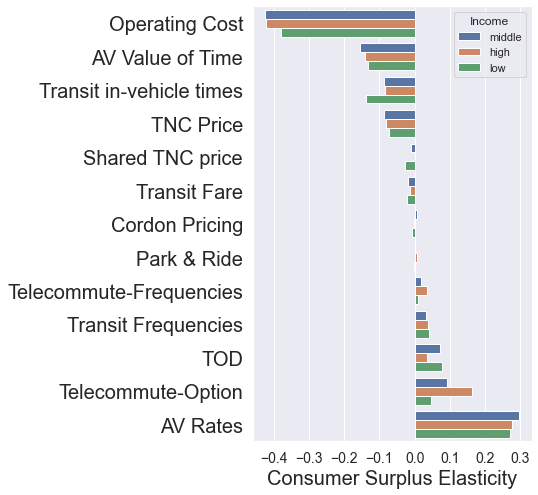

In [110]:
elasticity_plot('cs_per_capita_income', 
                'Consumer Surplus', 
                category_name = 'Income', cs = True)

,policy,Race,base_line,scenario_1_metric,scenario_2_metric,scenario_3_metric,scenario_4_metric,scenario_1_%change,scenario_2_%change,scenario_3_%change,scenario_4_%change,scenario_1_elasticity,scenario_2_elasticity,scenario_3_elasticity,scenario_4_elasticity,mean_elasticity
20,Operating Cost,asian,-407.901455,-549.168940,-492.454833,-358.542374,-307.413375,1.00,0.50,-0.25,-0.5,0.346327,0.414577,0.484029,0.492708,-0.434411
23,Operating Cost,white,-467.052527,-623.956991,-550.155009,-408.475087,-353.018201,1.00,0.50,-0.25,-0.5,0.335946,0.355859,0.501678,0.488315,-0.420449
21,Operating Cost,black,-476.958120,-622.252910,-556.509565,-429.333047,-374.446367,1.00,0.50,-0.25,-0.5,0.304628,0.333578,0.399407,0.429856,-0.366867
22,Operating Cost,other,-541.739890,-676.413231,-614.309493,-492.302741,-443.422459,1.00,0.50,-0.25,-0.5,0.248594,0.267913,0.365025,0.362969,-0.311125
44,AV Value of Time,asian,-420.687430,-414.810028,-408.572820,-390.450738,-374.787480,-0.10,-0.20,-0.40,-0.6,0.139709,0.143986,0.179686,0.181845,-0.161307
45,AV Value of Time,black,-489.738630,-484.236768,-473.685056,-457.150422,-442.198849,-0.10,-0.20,-0.40,-0.6,0.112343,0.163899,0.166355,0.161786,-0.151096
9,Transit in-vehicle times,black,-489.738630,-472.016386,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,0.144749,NaN,NaN,NaN,-0.144749
8,Transit in-vehicle times,asian,-420.687430,-405.843787,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,0.141137,NaN,NaN,NaN,-0.141137
47,AV Value of Time,white,-473.187104,-469.920655,-458.231584,-443.278086,-423.670389,-0.10,-0.20,-0.40,-0.6,0.069031,0.158030,0.158019,0.174409,-0.139872
10,Transit in-vehicle times,other,-553.134224,-535.679573,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,0.126224,NaN,NaN,NaN,-0.126224


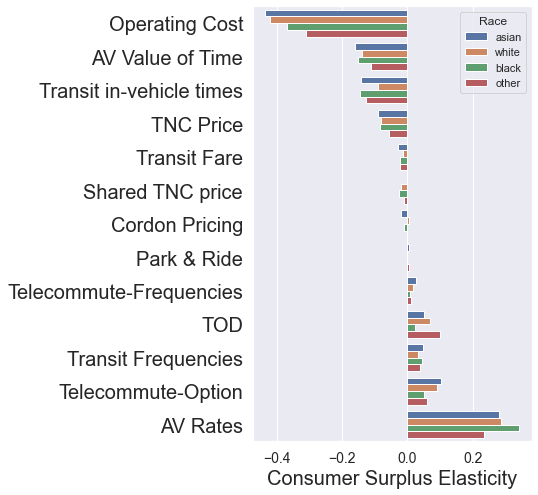

In [111]:
elasticity_plot('cs_per_capita_race', 
                'Consumer Surplus', 
                category_name = 'Race', cs = True)

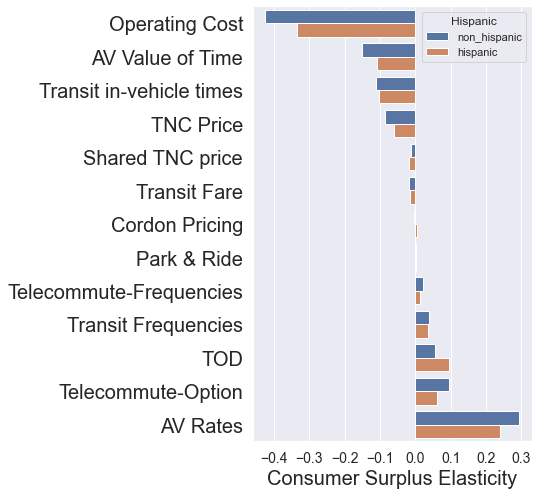

In [89]:
df = elasticity_plot('cs_per_capita_hispanic', 
                'Consumer Surplus', 
                category_name = 'Hispanic', cs = True)

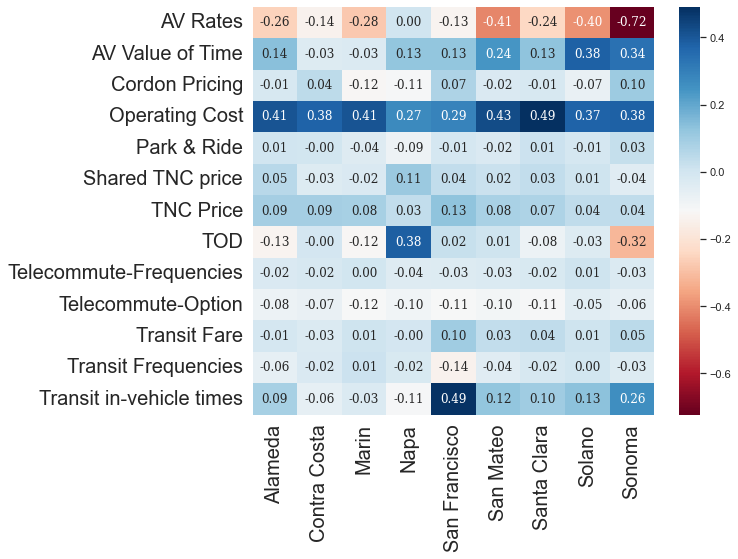

In [90]:
sns.set(rc={'figure.figsize':(9,7.5)})
elasticity_heatmap('cs_per_capita_county')

# Rideship

,policy,category,base_line,scenario_1_metric,scenario_2_metric,scenario_3_metric,scenario_4_metric,scenario_1_%change,scenario_2_%change,scenario_3_%change,scenario_4_%change,scenario_1_elasticity,scenario_2_elasticity,scenario_3_elasticity,scenario_4_elasticity,mean_elasticity
2,Transit in-vehicle times,none,1626553,2165573,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,-1.325552,NaN,NaN,NaN,-1.325552
1,Transit Fare,none,1626553,1493582,1690120.0,1794660.0,2003051.0,0.50,-0.25,-0.50,-1.0,-0.163500,-0.156323,-0.206703,-0.231470,-0.189499
10,AV Rates,none,1626553,1613583,1607537.0,1566256.0,1529368.0,0.05,0.10,0.25,0.5,-0.159478,-0.116910,-0.148282,-0.119498,-0.136042
8,Telecommute-Option,none,1951653,1915664,1927188.0,1991029.0,1990289.0,0.50,0.25,-0.25,-0.5,-0.036881,-0.050142,-0.080703,-0.039593,-0.051830
12,TOD,none,2089347,2075174,2078317.0,2082043.0,NaN,0.10,0.25,0.50,NaN,-0.067835,-0.021117,-0.006992,NaN,-0.031981
4,Shared TNC price,none,1951653,1953930,1946556.0,1967599.0,2001206.0,0.50,0.25,-0.25,-0.5,0.002333,-0.010447,-0.032682,-0.050781,-0.022894
9,Telecommute-Frequencies,none,1951653,1970515,1956270.0,1932573.0,1901460.0,-1.00,-0.50,1.00,2.0,-0.009665,-0.004731,-0.009776,-0.012859,-0.009258
3,TNC Price,none,1951653,1958388,1952790.0,1953899.0,1987033.0,0.50,0.25,-0.25,-0.5,0.006902,0.002330,-0.004603,-0.036256,-0.007907
7,Park & Ride,none,1951653,1950894,1954005.0,1950817.0,1944616.0,0.50,0.25,-0.25,-0.5,-0.000778,0.004821,0.001713,0.007211,0.003242
6,Cordon Pricing,none,1951653,1970366,1960224.0,1951138.0,1940078.0,0.25,0.10,-0.25,-0.5,0.038353,0.043917,0.001056,0.011862,0.023797


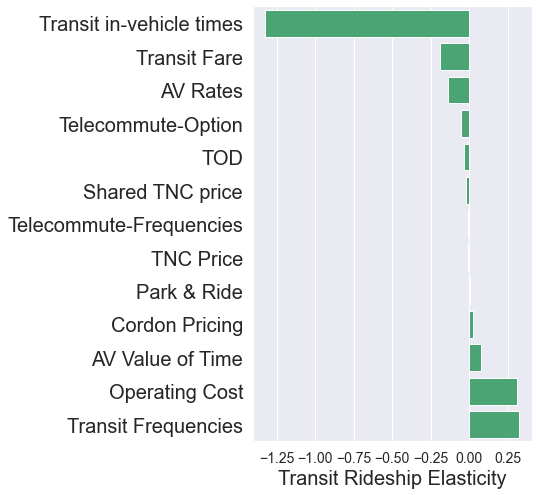

In [120]:
sns.set(rc={'figure.figsize':(5,8)})
elasticity_plot('transit_ridersip', 
                'Transit Rideship', 
                category_name = None)

# Mode shares

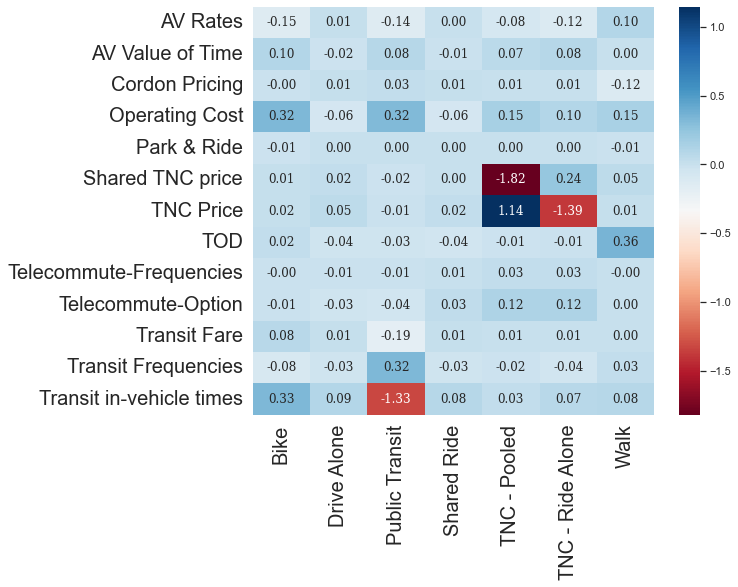

In [93]:
sns.set(rc={'figure.figsize':(9,7.5)})
elasticity_heatmap('mode_shares')

# Household Vehicle Owership

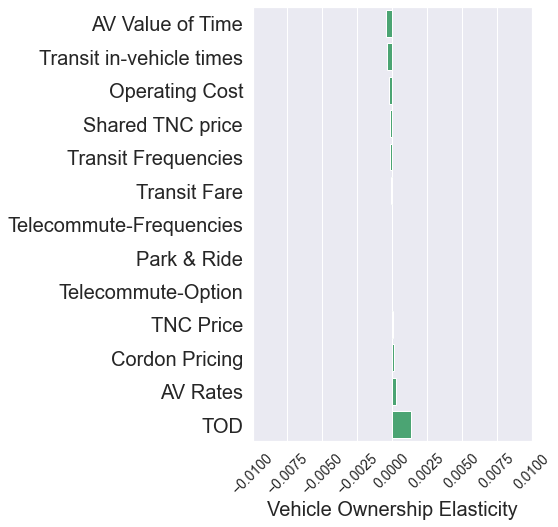

In [94]:
sns.set(rc={'figure.figsize':(5,8)})
df = elasticity_plot('average_vehicle_ownership', 
                'Vehicle Ownership', 
                category_name = None)
plt.xlim(-0.01,0.01)
plt.xticks(rotation = 45);

# Seat Utilization

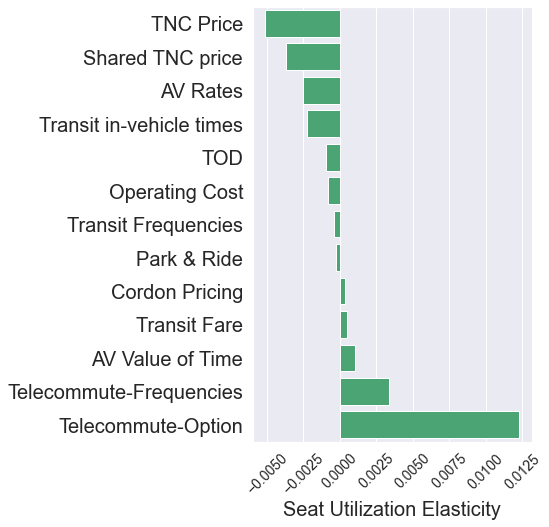

In [102]:
sns.set(rc={'figure.figsize':(5,8)})
elasticity_plot('seat_utilization', 
                'Seat Utilization', 
                category_name = None)
plt.xticks(rotation = 45);

# Average Travel Time

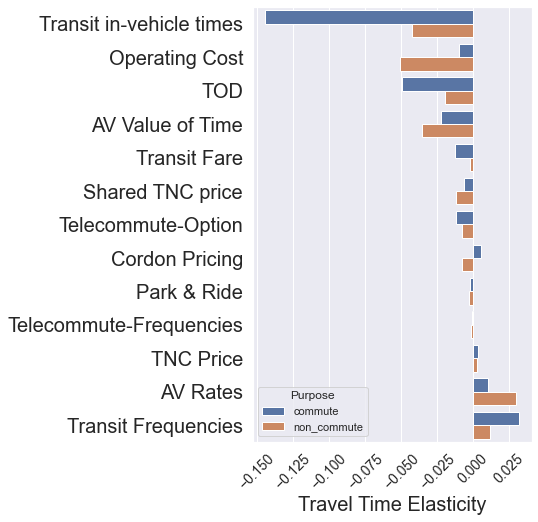

In [115]:
sns.set(rc={'figure.figsize':(5,8)})
df = elasticity_plot('average_traveltime_purpose', 
                'Travel Time', 
                category_name = 'Purpose')
plt.xticks(rotation = 45);

In [116]:
df

,policy,Purpose,base_line,scenario_1_metric,scenario_2_metric,scenario_3_metric,scenario_4_metric,scenario_1_%change,scenario_2_%change,scenario_3_%change,scenario_4_%change,scenario_1_elasticity,scenario_2_elasticity,scenario_3_elasticity,scenario_4_elasticity,mean_elasticity
4,Transit in-vehicle times,commute,18.800262,19.478584,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,-0.144322,NaN,NaN,NaN,-0.144322
11,Operating Cost,non_commute,16.714237,15.826928,16.248011,16.858675,17.205832,1.00,0.50,-0.25,-0.5,-0.053087,-0.055788,-0.034566,-0.058823,-0.050566
24,TOD,commute,18.957575,18.758333,18.833904,18.789415,NaN,0.10,0.25,0.50,NaN,-0.105099,-0.026094,-0.017741,NaN,-0.049644
5,Transit in-vehicle times,non_commute,16.613955,16.791172,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,-0.042667,NaN,NaN,NaN,-0.042667
23,AV Value of Time,non_commute,16.613955,16.743349,16.622372,16.850586,16.875542,-0.10,-0.20,-0.40,-0.6,-0.077883,-0.002533,-0.035607,-0.026242,-0.035566
22,AV Value of Time,commute,18.800262,18.847385,18.869274,18.950235,19.099947,-0.10,-0.20,-0.40,-0.6,-0.025065,-0.018354,-0.019943,-0.026567,-0.022482
25,TOD,non_commute,16.434057,16.366627,16.397614,16.358767,NaN,0.10,0.25,0.50,NaN,-0.041031,-0.008870,-0.009163,NaN,-0.019688
2,Transit Fare,commute,18.800262,18.708822,18.790991,18.986351,19.257845,0.50,-0.25,-0.50,-1.0,-0.009728,0.001973,-0.019796,-0.024339,-0.012973
9,Shared TNC price,non_commute,16.714237,16.826942,16.494419,16.768394,16.691505,0.50,0.25,-0.25,-0.5,0.013486,-0.052606,-0.012961,0.002720,-0.012340
16,Telecommute-Option,commute,19.119364,19.137255,19.058678,19.238346,19.238985,0.50,0.25,-0.25,-0.5,0.001871,-0.012696,-0.024893,-0.012513,-0.012058


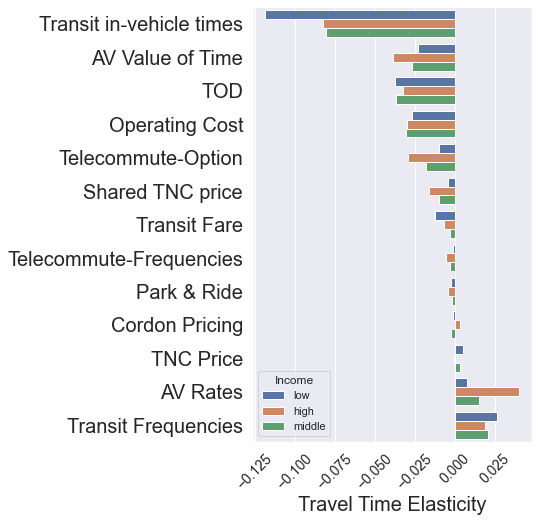

In [117]:
df = elasticity_plot('average_traveltime_income', 
                'Travel Time', 
                category_name = 'Income')
plt.xticks(rotation = 45);

In [118]:
df

,policy,Income,base_line,scenario_1_metric,scenario_2_metric,scenario_3_metric,scenario_4_metric,scenario_1_%change,scenario_2_%change,scenario_3_%change,scenario_4_%change,scenario_1_elasticity,scenario_2_elasticity,scenario_3_elasticity,scenario_4_elasticity,mean_elasticity
7,Transit in-vehicle times,low,16.910015,17.410555,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,-0.118401,NaN,NaN,NaN,-0.118401
6,Transit in-vehicle times,high,18.260262,18.635769,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,-0.082257,NaN,NaN,NaN,-0.082257
8,Transit in-vehicle times,middle,18.389563,18.760815,NaN,NaN,NaN,-0.25,NaN,NaN,NaN,-0.080753,NaN,NaN,NaN,-0.080753
33,AV Value of Time,high,18.260262,18.368822,18.356949,18.521858,18.632505,-0.10,-0.20,-0.40,-0.6,-0.059452,-0.026475,-0.035815,-0.033976,-0.038929
37,TOD,low,16.964457,16.838436,16.871302,16.834536,NaN,0.10,0.25,0.50,NaN,-0.074285,-0.021965,-0.015317,NaN,-0.037189
38,TOD,middle,18.319719,18.181850,18.226740,18.178127,NaN,0.10,0.25,0.50,NaN,-0.075257,-0.020301,-0.015458,NaN,-0.037005
36,TOD,high,18.203527,18.061558,18.160490,18.116028,NaN,0.10,0.25,0.50,NaN,-0.077990,-0.009457,-0.009613,NaN,-0.032354
17,Operating Cost,middle,18.541513,17.984003,18.227449,18.620697,18.927267,1.00,0.50,-0.25,-0.5,-0.030068,-0.033877,-0.017082,-0.041610,-0.030659
15,Operating Cost,high,18.431459,17.688019,18.142130,18.476400,18.783251,1.00,0.50,-0.25,-0.5,-0.040335,-0.031395,-0.009753,-0.038173,-0.029914
24,Telecommute-Option,high,18.431459,18.343714,18.272648,18.634274,18.704563,0.50,0.25,-0.25,-0.5,-0.009521,-0.034465,-0.044015,-0.029635,-0.029409


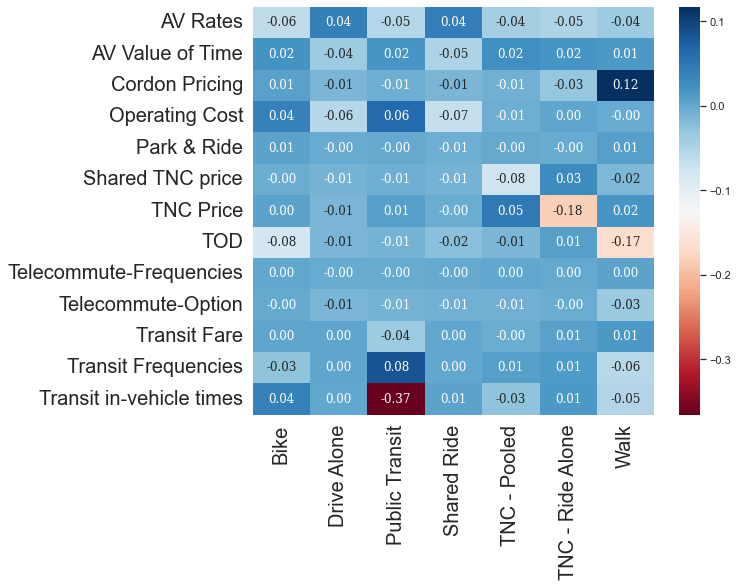

In [99]:
sns.set(rc={'figure.figsize':(9,7.5)})
elasticity_heatmap('average_traveltime_mode')

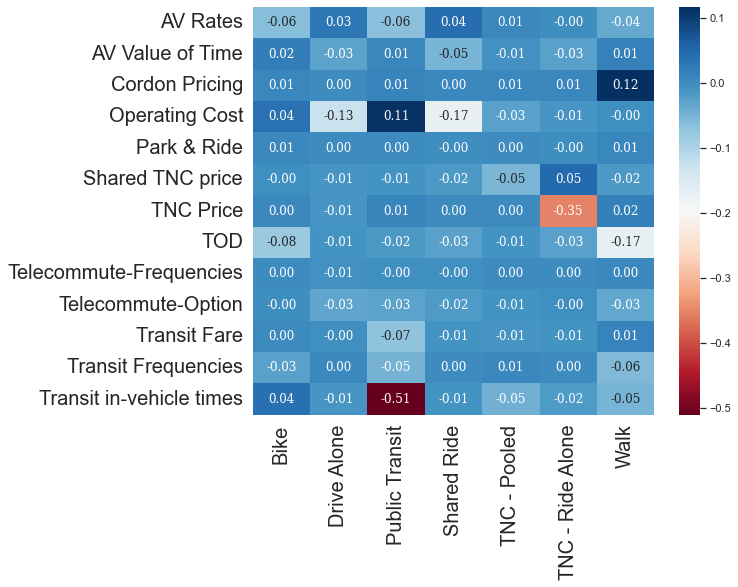

In [100]:
elasticity_heatmap('average_commute_trip_lenght')